# Part 2: The Wine Dataset

The Wine dataset is a commonly used dataset in machine learning and data analysis, primarily for classification tasks. It represents the results of a chemical analysis of wines originating from three different grape varieties (classes). Each class corresponds to a different type of wine. The dataset contains a set of features derived from this chemical analysis.

- Number of Classes: 3 (representing three different types of wines)
- Number of Samples: 178
- Number of Features: 13 (chemical attributes)

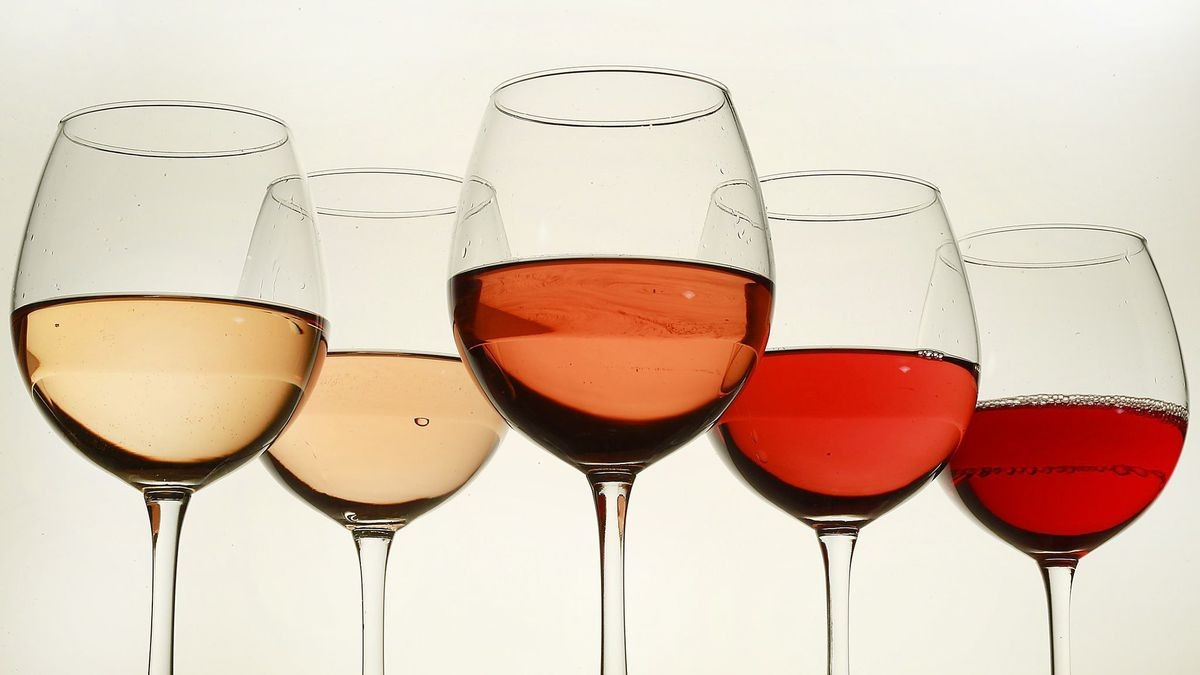

Let's now repeat the process with this new dataset.

In [7]:
from sklearn import datasets
import pandas as pd

# Load the Wine dataset
wine = datasets.load_wine()

# Extract the features (X) and target labels (y)
X = wine.data
y = wine.target

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [6]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


The plots we did before can be easily done using **seaborn**, a fantastic visualization library. Investigate how we can use the `pairplot` [function](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a plot using the dataframe we just created.

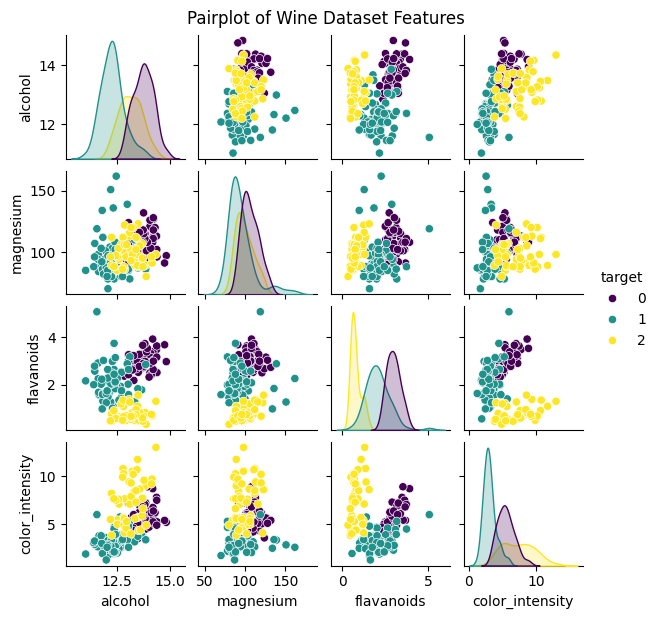

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(wine_df, hue='target',
             palette='viridis',
             diag_kind='kde',
             x_vars=['alcohol', 'magnesium', 'flavanoids', 'color_intensity'],
             y_vars=['alcohol', 'magnesium', 'flavanoids', 'color_intensity'],
             height=1.5
             )
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()

In [80]:
from sklearn import datasets
import numpy as np
# Load the Wine dataset
wine = datasets.load_wine()
np.set_printoptions(suppress=True,precision=2)
def mezcla(datos):
  x = datos['data']
  y = datos['target']
  conjunto = np.column_stack((x,y))
  np.random.shuffle(conjunto)
  return conjunto[:,:-1],conjunto[:,-1]
X,y = mezcla(wine)
print(y)

[1. 1. 1. 0. 0. 0. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 0. 2. 1. 1.
 0. 1. 1. 0. 2. 0. 0. 1. 1. 2. 1. 0. 0. 1. 0. 1. 1. 0. 2. 2. 0. 2. 0. 2.
 1. 0. 1. 2. 1. 1. 0. 0. 1. 2. 2. 1. 2. 2. 2. 1. 0. 0. 0. 0. 1. 0. 1. 2.
 1. 1. 2. 0. 1. 0. 1. 1. 0. 1. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 1. 1. 1. 0.
 1. 1. 1. 0. 2. 0. 0. 0. 0. 0. 1. 2. 1. 2. 2. 2. 0. 2. 0. 0. 1. 2. 0. 1.
 2. 2. 0. 2. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 2. 1. 1. 1. 0. 0. 0. 0. 1.
 2. 1. 2. 0. 1. 0. 2. 2. 0. 2. 1. 1. 0. 2. 1. 0. 2. 1. 2. 1. 2. 2. 1. 2.
 1. 1. 0. 1. 1. 0. 1. 0. 2. 0.]


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
## use a random forest classifier to identify the wines
## Get the accuracy of your model
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=500,max_leaf_nodes=20)
random_forest.fit(X_train,y_train)
pred = random_forest.predict(X_test)
acierto = accuracy_score(y_test,pred)
print(acierto)

0.9814814814814815


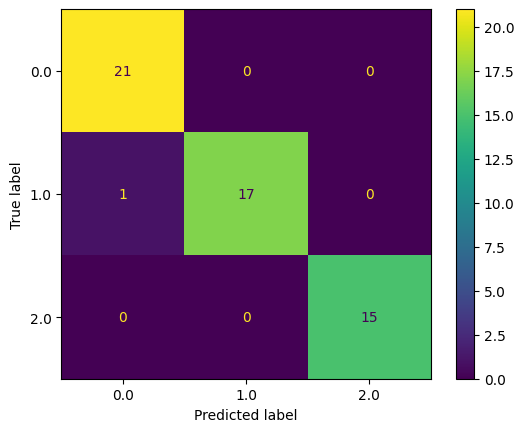

In [93]:
## Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred)

Great! Now that we trained the model, let's see if training a model with less features afects the model. We will use the following function: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). It has to be used as any other sklearn model. You can use the functions `.fit` and `.transform` to train and transform data.




In [84]:
## Use Select KBest to select N amount of features.
from sklearn.feature_selection import SelectKBest,f_classif
kbest = SelectKBest(score_func=f_classif,k=5)
kbest.fit(X_train,y_train)
nueva_X = kbest.transform(X_train)
print(nueva_X.shape)
nueva_X_test = kbest.transform(X_test)

(124, 5)


Let's train a classifier with the selected features

In [90]:
# Train classifier with selected features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
classificador = LogisticRegression(max_iter=10000)
classificador.fit(nueva_X,y_train)
y_pred = classificador.predict(nueva_X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9814814814814815


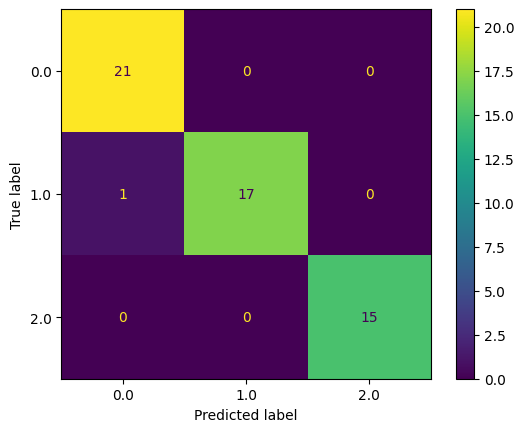

In [89]:
## Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

Let's now check the features selected by our select K best

In [ ]:
## Let's visualize these features



In [92]:
import numpy as np
import sklearn.feature_selection
# Get a boolean mask of selected features
selected_feature_mask = kbest.get_support()

# Get the names of the selected features
selected_feature_names = np.array(wine['feature_names'])[selected_feature_mask] # type: ignore

print(selected_feature_names)

['alcohol' 'flavanoids' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']
